In [1]:
# change root path one level up
import os
os.chdir("..")

In [139]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pytz
import seaborn as sns
from joypy import joyplot
from matplotlib import cm
from pandas.plotting import autocorrelation_plot
from datetime import datetime, timedelta
# import TSNE
from sklearn.manifold import TSNE
# minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# read xls
docs_df = pd.read_csv("data/caltech_test_data.csv")
durations = docs_df["parking_time"]
requested_durations = docs_df["Requested_parking_time"]
# connection_time_copy
docs_df


,connection_time_copy,_id,stationID,spaceID,siteID,clusterID,kWhDelivered,userID,parking_time,idle_time,...,connectionTime_Month,connectionTime_weekday_hour,connectionTime_hour_x,connectionTime_hour_y,connectionTime_month_x,connectionTime_month_y,connectionTime_weekday_x,connectionTime_weekday_y,connectionTime_is_holiday,connectionTime_is_weekend
0,2018-04-30,5bc915caf9af8b0dad3c0660,2-39-88-24,CA-314,2,39,47.808,22,9.335000,9.333889,...,4,0-8,-5.000000e-01,8.660254e-01,0.892254,-0.451533,9.555728e-01,0.294755,0,0
1,2018-05-07,5bc917d0f9af8b0dc677b8bb,2-39-139-28,CA-303,2,39,27.683,61,10.611944,10.609722,...,5,0-7,-2.588190e-01,9.659258e-01,0.565554,0.824711,9.659258e-01,0.258819,0,0
2,2018-05-11,5bc9190ff9af8b0dc677b9c1,2-39-88-24,CA-314,2,39,17.485,22,9.028333,7.815278,...,5,4-8,-5.000000e-01,8.660254e-01,-0.232105,0.972691,-7.330519e-01,-0.680173,0,0
3,2018-05-14,5bc919c3f9af8b0dc677ba32,2-39-79-380,CA-489,2,39,11.795,66,9.321944,6.887222,...,5,0-6,8.770390e-14,1.000000e+00,-0.742684,0.669642,9.749279e-01,0.222521,0,0
4,2018-05-14,5bc919c3f9af8b0dc677ba62,2-39-139-28,CA-303,2,39,3.076,61,1.121944,0.539444,...,5,0-17,-2.588190e-01,-9.659258e-01,-0.802694,0.596391,8.045978e-01,0.593820,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,2019-12-30,5e1fbc9ff9af8b5391bcd6fc,2-39-89-25,CA-315,2,39,5.814,743,2.066667,NaN,...,12,0-9,-7.071068e-01,7.071068e-01,0.968119,-0.250491,9.438833e-01,0.330279,0,0
4953,2019-12-30,5e1fbc9ff9af8b5391bcd700,2-39-79-377,CA-325,2,39,6.509,1124,7.735556,2.030278,...,12,0-12,-1.000000e+00,-9.512791e-14,0.974267,-0.225399,9.009689e-01,0.433884,0,0
4954,2019-12-31,5e210e1ff9af8b57bb4f54fa,2-39-89-25,CA-315,2,39,4.793,743,1.963889,1.585833,...,12,1-8,-5.000000e-01,8.660254e-01,0.998482,-0.055088,3.653410e-01,0.930874,0,0
4955,2019-12-31,5e210e1ff9af8b57bb4f54fd,2-39-79-377,CA-325,2,39,6.618,1124,7.338333,2.018333,...,12,1-11,-9.659258e-01,2.588190e-01,0.999571,-0.029276,2.588190e-01,0.965926,0,0


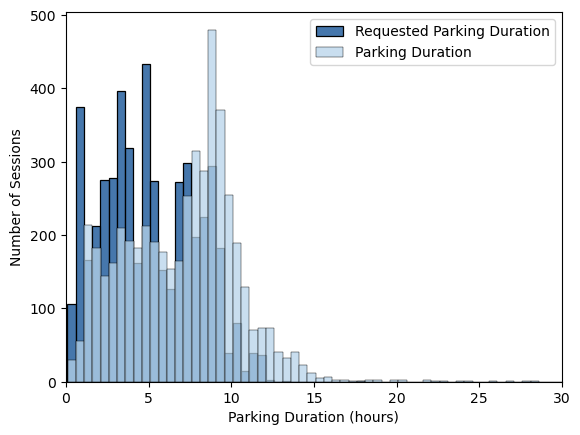

In [4]:
# plot parking duration
fig, ax = plt.subplots()
# list of colors light blue and dark blue
colors = [cm.Blues(0.3), cm.Blues(0.9)]
sns.histplot(
    requested_durations,
    stat="count",
    label="Requested Parking Duration",
    binwidth=0.5,
    ax=ax,
    color=colors[1],
)
sns.histplot(
    durations,
    stat="count",
    label="Parking Duration",
    binwidth=0.5,
    ax=ax,
    color=colors[0],
)

plt.xlabel("Parking Duration (hours)")
plt.ylabel("Number of Sessions")
# plt.title('Parking Duration Distribution')
plt.legend()
# x limit
plt.xlim(0, 30)
# remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


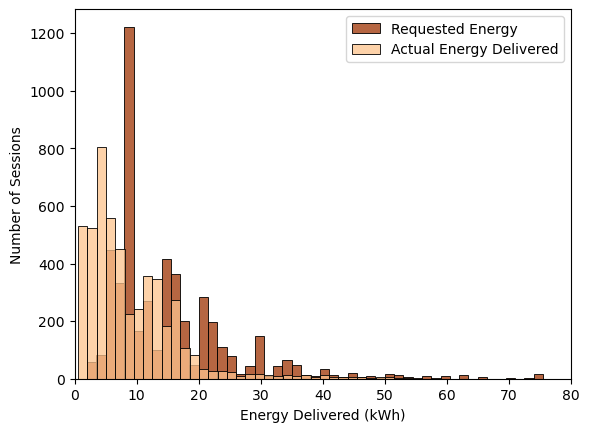

In [5]:
# plot parking duration
fig, ax = plt.subplots()
# colors light orange and red
colors = [cm.Oranges(0.3), cm.Oranges(0.9)]
sns.histplot(
    docs_df["kWhRequested"],
    stat="count",
    label="Requested Energy",
    binwidth=1.5,
    ax=ax,
    color=colors[1],
)
sns.histplot(
    docs_df["kWhDelivered"],
    stat="count",
    label="Actual Energy Delivered",
    binwidth=1.5,
    ax=ax,
    color=colors[0],
)
plt.xlabel("Energy Delivered (kWh)")
plt.ylabel("Number of Sessions")
# plt.title('Acn')
plt.legend()
# x limit
plt.xlim(0, 80)
# remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


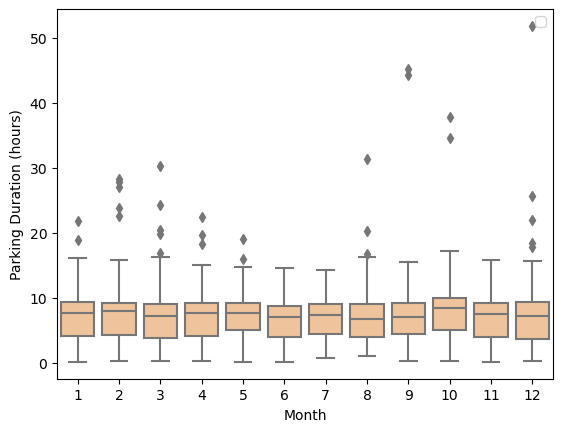

In [6]:
# plot the boxplot of parking duration varying by connectionTime_Month
fig, ax = plt.subplots()
# colors light orange and red
colors = [cm.Oranges(0.3), cm.Oranges(0.9)]
sns.boxplot(
    x="connectionTime_Month", y="parking_time", data=docs_df, ax=ax, color=colors[0]
)
plt.xlabel("Month")
plt.ylabel("Parking Duration (hours)")
# plt.title('Acn')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


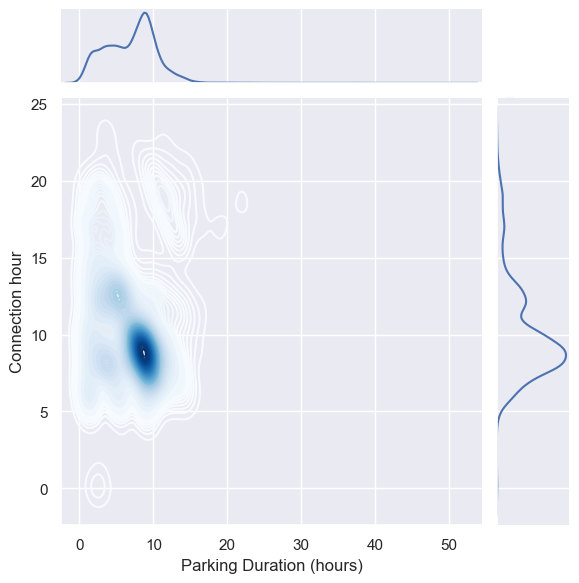

In [7]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set(style="ticks")
sns.set_style("darkgrid")
# cmap blues
cmap = cm.get_cmap("Blues", 30)
# plot the distrubution of parking time per hour of day
# i.e. how many sessions started at 1am, 2am, etc.
# plot the distribution of the value variable grouped by the category variable
# sns.jointplot(data=docs_df, x='parking_time', y='connectionTime_Hour', kind='kde', fill=True, thresh=0, levels=100, cmap='gray_r')
sns.jointplot(
    data=docs_df,
    x="parking_time",
    y="connectionTime_Hour",
    kind="kde",
    cmap=cmap,
    thresh=0,
    levels=100,
)
# sns.jointplot(data=docs_df, x='connection_hour', y='parking_time', kind='kde', fill=True, thresh=0, cmap='Blues')

plt.xlabel("Parking Duration (hours)")
plt.ylabel("Connection hour")
# plt.title('Parking Duration Distribution by Hour of Day')
# put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# y limit
# plt.xlim(0, 2000)
# add fine grid
# plt.grid(linestyle='-', linewidth='0.5', color='gray')
plt.show()


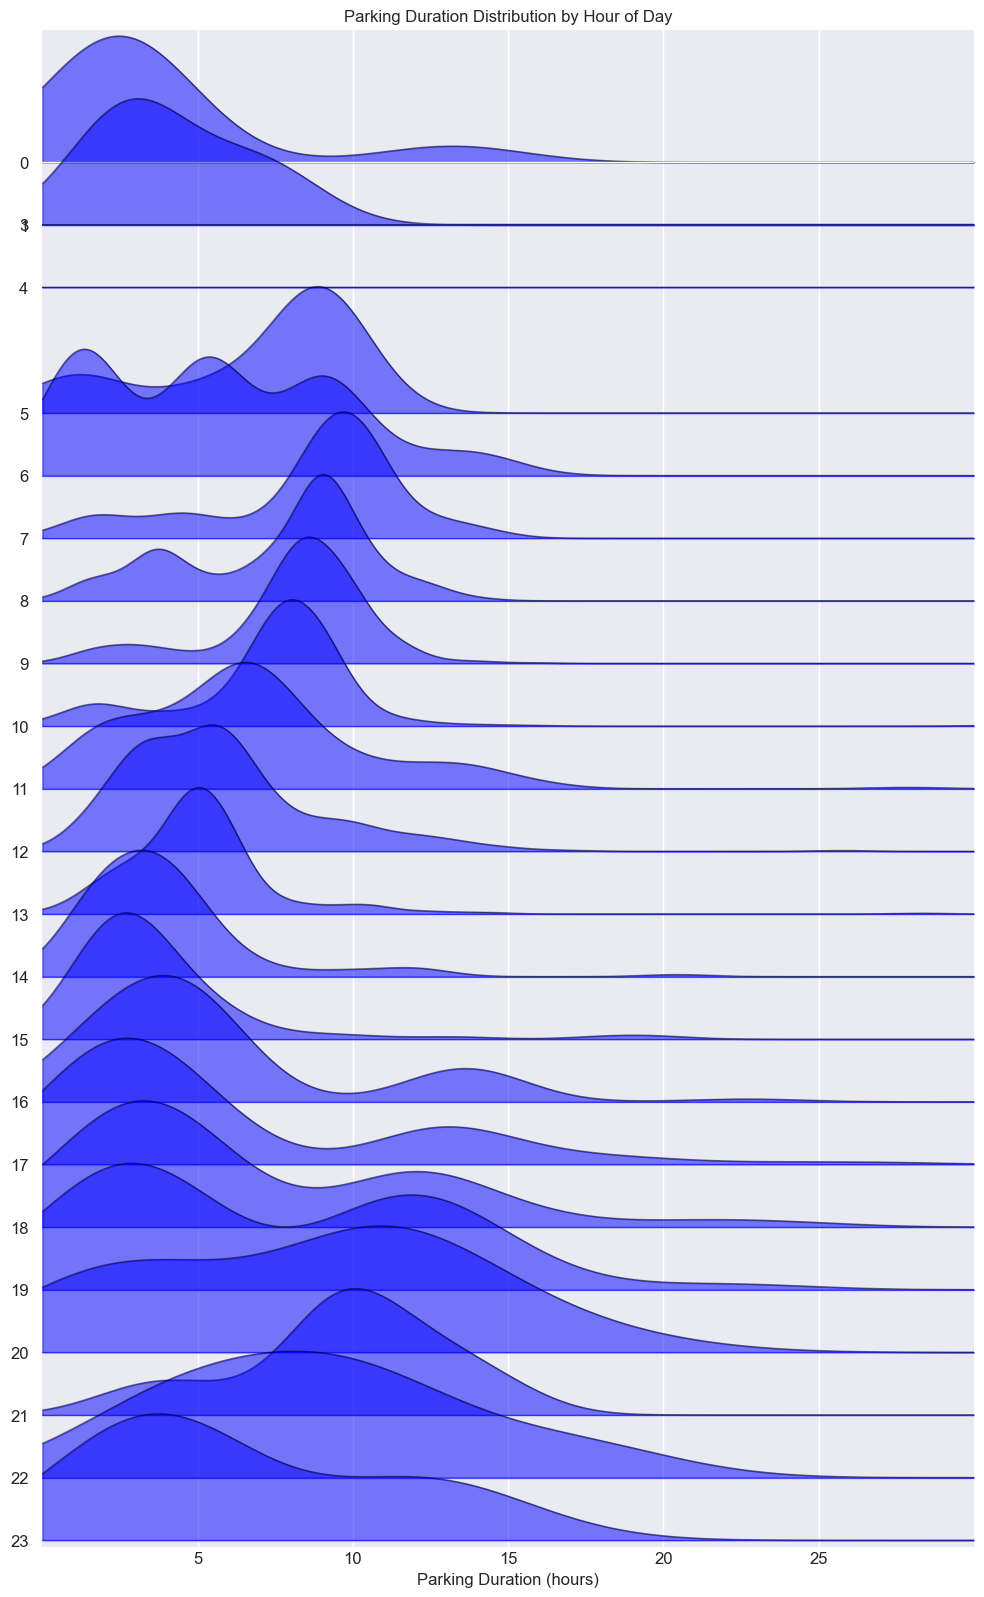

In [8]:
# cm map blue
cmap = cm.get_cmap("Blues")
# drop rows with connection_hour == 3
docs_df_temp = docs_df.copy()
# docs_df_temp['parking_time_hours'] = docs_df_temp['parking_time'] / 60
# plot the distribution of the value variable grouped by the category variable
fig, axes = joyplot(
    docs_df_temp,
    by="connectionTime_Hour",
    column="parking_time",
    kind="kde",
    x_range=[0, 30],
    ylim="own",
    grid=True,
    tails=False,  # size
    # size
    figsize=(10, 16),
    overlap=1,
    linewidth=1,
    color="blue",
    linecolor="black",
    alpha=0.5,
    title="Parking Duration Distribution by Hour of Day",
)
# add title
plt.title("Parking Duration Distribution by Hour of Day")
# add x label
plt.xlabel("Parking Duration (hours)")
# add y label
plt.ylabel("Connection hour")
plt.show()


In [12]:
# find dates 30, 60, 120, 240, 360, 480, 600 days before 2020-12-01 and make a list of them
dates = []
for i in [30, 60, 120, 240, 360, 480]:
    dates.append((datetime(2019, 12, 1) - timedelta(days=i)).strftime("%Y-%m-%d"))
dates


['2019-11-01',
 '2019-10-02',
 '2019-08-03',
 '2019-04-05',
 '2018-12-06',
 '2018-08-08']

In [13]:
docs_df_temp = docs_df.copy()
# connection_time_copy to datetime
docs_df_temp["connection_time_copy"] = pd.to_datetime(
    docs_df_temp["connection_time_copy"]
)
docs_df_temp_train = docs_df_temp[docs_df_temp["connection_time_copy"] < "2019-12-01"]
docs_df_temp_test = docs_df_temp[docs_df_temp["connection_time_copy"] >= "2019-12-01"]
docs_df_temp_train0 = docs_df_temp_train.loc[
    docs_df_temp_train["connection_time_copy"] > dates[0]
]
docs_df_temp_train1 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[1])
    & (docs_df_temp_train["connection_time_copy"] < dates[0])
]
docs_df_temp_train2 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[2])
    & (docs_df_temp_train["connection_time_copy"] < dates[1])
]
docs_df_temp_train3 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[3])
    & (docs_df_temp_train["connection_time_copy"] < dates[2])
]
docs_df_temp_train4 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[4])
    & (docs_df_temp_train["connection_time_copy"] < dates[3])
]
docs_df_temp_train5 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[5])
    & (docs_df_temp_train["connection_time_copy"] < dates[4])
]


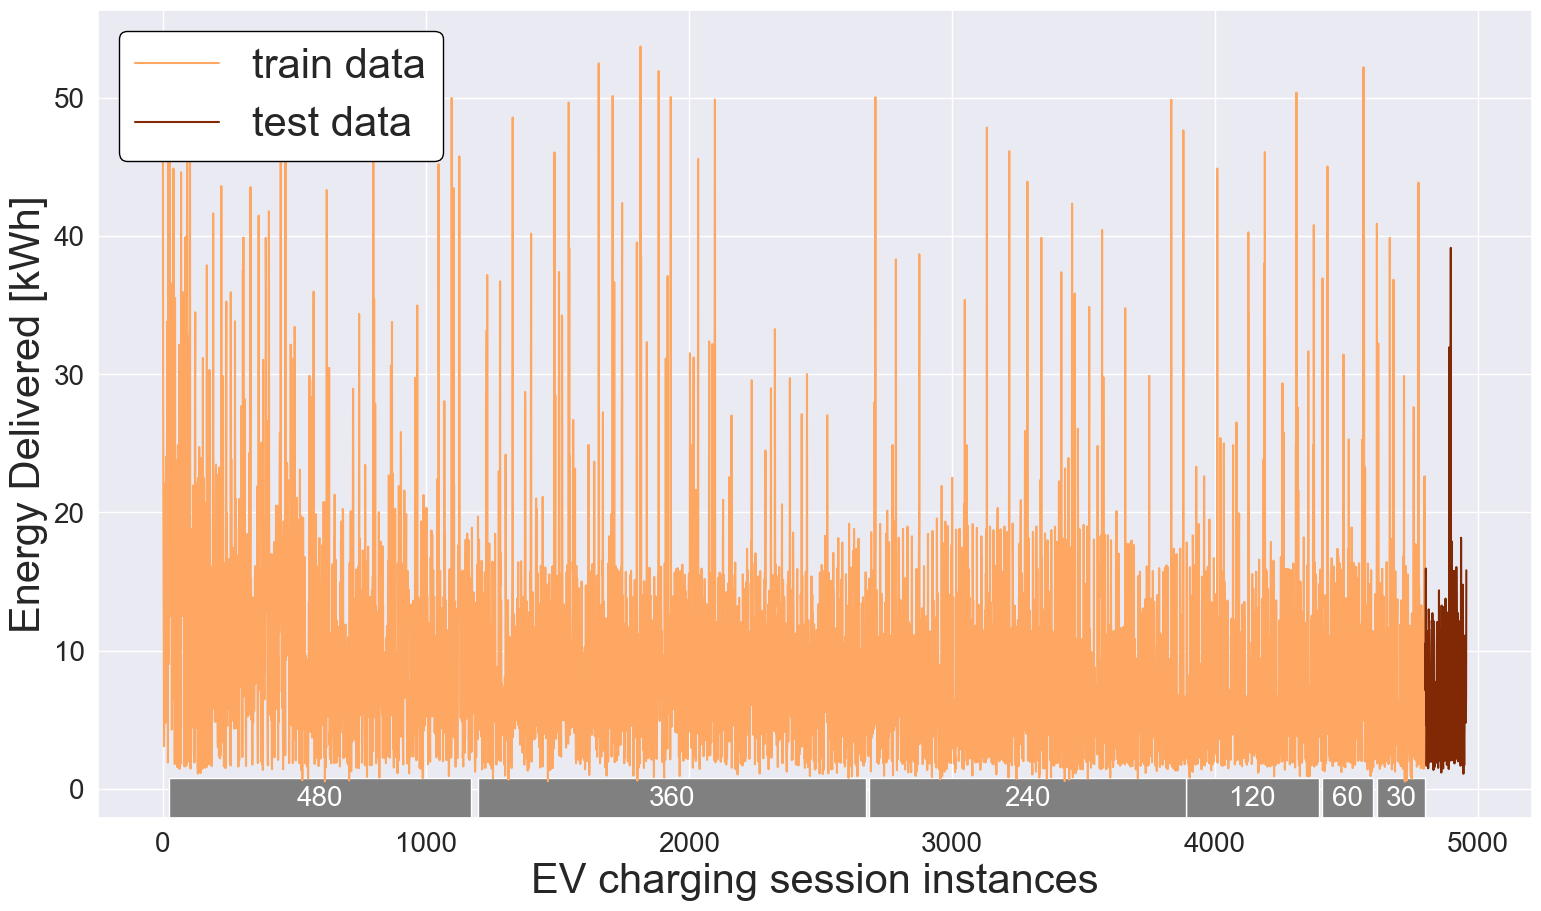

In [14]:
# plot kWh Delievered time series vs index
fig, ax = plt.subplots()
# list of orange colors with 8 light shades and 1 dark shade
# colors = cm.Oranges()

ax.plot(docs_df_temp_train["kWhDelivered"], color=cm.Oranges(0.4), label="train data")

ax.plot(docs_df_temp_test["kWhDelivered"], color=cm.Oranges(0.99), label="test data")
# make camvas wider
fig.set_size_inches(18.5, 10.5)
# sns grid style
sns.set_style("darkgrid")
# add x label
plt.xlabel("EV charging session instances")
# add y label
plt.ylabel("Energy Delivered [kWh]")
# make labels and ticks bigger
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# make axis labels bigger
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
# add legend
plt.legend(
    loc="upper left",
    fontsize=30,
    frameon=True,
    framealpha=1,
    facecolor="white",
    edgecolor="black",
)

days_list = [30, 60, 120, 240, 360, 480]
# add subplots with indicated intervals of the x-axis length of the corresponding data
for i, df in enumerate(
    [
        docs_df_temp_train0,
        docs_df_temp_train1,
        docs_df_temp_train2,
        docs_df_temp_train3,
        docs_df_temp_train4,
        docs_df_temp_train5,
    ]
):
    x_min = df.index[0]
    x_max = df.index[-1]
    x_len = x_max - x_min
    y_min, y_max = ax.get_ylim()
    ax.axvspan(x_min, x_max, ymin=0, ymax=0.05, facecolor="gray")
    ax.text(
        x_min + x_len / 2,
        y_max * (-0.03),
        f"{days_list[i]}",
        ha="center",
        va="bottom",
        fontsize=20,
        color="white",
    )

plt.show()


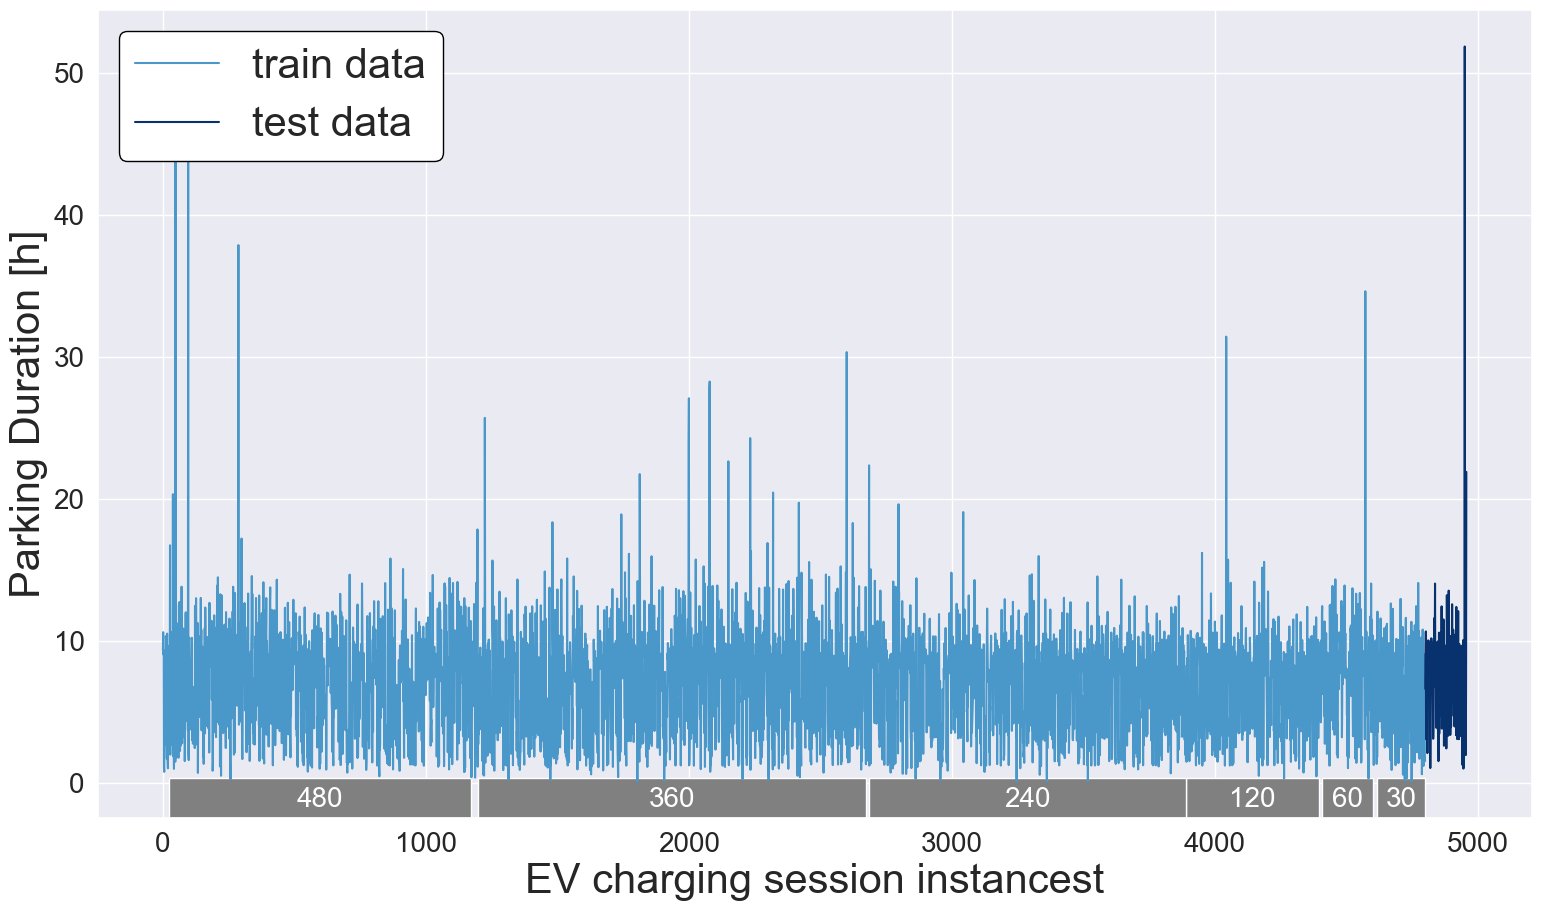

In [15]:
# list of 2 colors blues
colors = [cm.Blues(0.5), cm.Blues(0.9)]
# plot kWh Delievered time series vs index
fig, ax = plt.subplots()
ax.plot(docs_df_temp_train["parking_time"], color=cm.Blues(0.6), label="train data")
ax.plot(docs_df_temp_test["parking_time"], color=cm.Blues(0.99), label="test data")
# make camvas wider
fig.set_size_inches(18.5, 10.5)
# sns grid style
sns.set_style("darkgrid")
# add x label
plt.xlabel("EV charging session instancest")
# add y label
plt.ylabel("Parking Duration [h]")
# make labels and ticks bigger
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# make axis labels bigger
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
# add legend
plt.legend(
    loc="upper left",
    fontsize=30,
    frameon=True,
    framealpha=1,
    facecolor="white",
    edgecolor="black",
)
days_list = [30, 60, 120, 240, 360, 480]
# add subplots with indicated intervals of the x-axis length of the corresponding data
for i, df in enumerate(
    [
        docs_df_temp_train0,
        docs_df_temp_train1,
        docs_df_temp_train2,
        docs_df_temp_train3,
        docs_df_temp_train4,
        docs_df_temp_train5,
    ]
):
    x_min = df.index[0]
    x_max = df.index[-1]
    x_len = x_max - x_min
    y_min, y_max = ax.get_ylim()
    ax.axvspan(x_min, x_max, ymin=0, ymax=0.05, facecolor="gray")
    ax.text(
        x_min + x_len / 2,
        y_max * (-0.039),
        f"{days_list[i]}",
        ha="center",
        va="bottom",
        fontsize=20,
        color="white",
    )

plt.show()

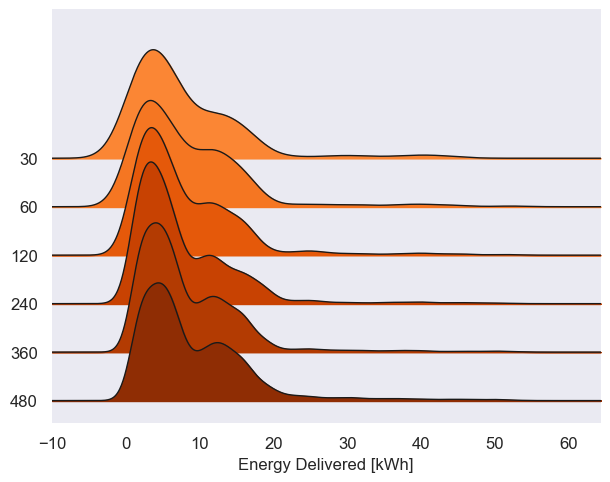

In [155]:
TARGET = "kWhDelivered"
docs_df_temp_train0 = docs_df_temp_train.loc[
    docs_df_temp_train["connection_time_copy"] > dates[0]
]
docs_df_temp_train1 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[1])
]
docs_df_temp_train2 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[2])
]
docs_df_temp_train3 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[3])
]
docs_df_temp_train4 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[4])
]
docs_df_temp_train5 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[5])
]

ridge_df = pd.DataFrame(index=docs_df_temp.index)
# make all values nan
ridge_df[:] = np.nan
periods = [30, 60, 120, 240, 360, 480]
# make a dataframe with each column containing only values of a specific lookbackperiod
for i, df in enumerate(
    [
        docs_df_temp_train0,
        docs_df_temp_train1,
        docs_df_temp_train2,
        docs_df_temp_train3,
        docs_df_temp_train4,
        docs_df_temp_train5,
    ]
):
    # take values of df and put them in the corresponding column of the ridge_df
    ridge_df.loc[df.index, '{}'.format(periods[i])] = df[TARGET].values

cmap = cm.Oranges(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig, axes = joyplot(
    ridge_df, 
    overlap=1.5,
    linewidth=1,
    colormap=cmap,
    )
axes[-1].set_xlabel("Energy Delivered [kWh]")
plt.show()


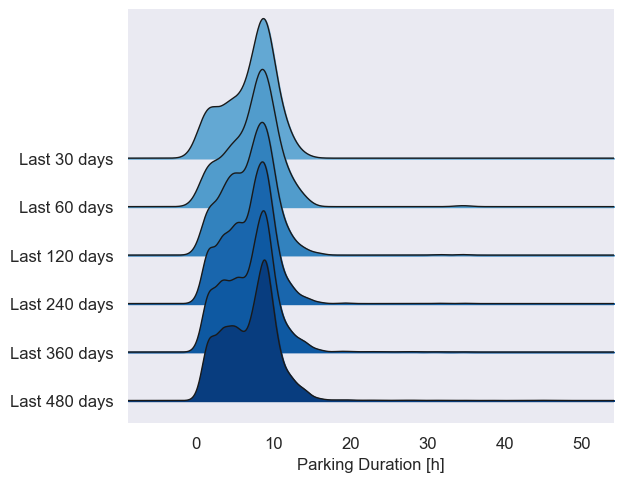

In [154]:
TARGET = "parking_time"
docs_df_temp_train0 = docs_df_temp_train.loc[
    docs_df_temp_train["connection_time_copy"] > dates[0]
]
docs_df_temp_train1 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[1])
]
docs_df_temp_train2 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[2])
]
docs_df_temp_train3 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[3])
]
docs_df_temp_train4 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[4])
]
docs_df_temp_train5 = docs_df_temp_train.loc[
    (docs_df_temp_train["connection_time_copy"] > dates[5])
]

ridge_df = pd.DataFrame(index=docs_df_temp.index)
# make all values nan
ridge_df[:] = np.nan
periods = [30, 60, 120, 240, 360, 480]
# make a dataframe with each column containing only values of a specific lookbackperiod
for i, df in enumerate(
    [
        docs_df_temp_train0,
        docs_df_temp_train1,
        docs_df_temp_train2,
        docs_df_temp_train3,
        docs_df_temp_train4,
        docs_df_temp_train5,
    ]
):
    # take values of df and put them in the corresponding column of the ridge_df
    ridge_df.loc[df.index, 'Last {} days'.format(periods[i])] = df[TARGET].values

cmap = cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig, axes = joyplot(
    ridge_df, 
    overlap=1.5,
    linewidth=1,
    # dark blue colormap
    colormap=cmap,
    )
axes[-1].set_xlabel("Parking Duration [h]")
plt.show()